# <font color='Purple'>**LSTM_RNN_Tutorial**</font>


>[LSTM_RNN_Tutorial](#scrollTo=vp8WoBLHNC8w)

>>[1. Import the Required Libraries & Modules](#scrollTo=ZwUbH7LWdKKv)

>>[2. Load the Monthly Sunspot dataset](#scrollTo=Gl38CKbdO5TU)

>>[3. Data Visualization](#scrollTo=fNpctAMIGPzm)

>>[4. Data Preprocessing](#scrollTo=7mvSo65USHm5)

>>>[4.1 Create Independent & Dependent Variables](#scrollTo=rvBa4oijUMha)

>>>>[Define a prepare data function to create independent & dependent variables](#scrollTo=x77PaQZB5Jdv)

>>[5. Model Development & Evaluation](#scrollTo=hajJyton4HpS)

>>>>[Define a LSTM_RNN function to build RNN model](#scrollTo=ZZOqfnLpVRRZ)

>>[6. Model Prediction](#scrollTo=UGPxzSOGF6mD)



## <font color='green'>**1. Import the Required Libraries & Modules**</font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM

## <font color='green'>**2. Load the Monthly Sunspot dataset**</font>

In [2]:
time_data=[110,124,132,90,158,102,173,187,194,211]
n_steps=3
time_data

[110, 124, 132, 90, 158, 102, 173, 187, 194, 211]

## <font color='green'>**3. Data Visualization**</font>

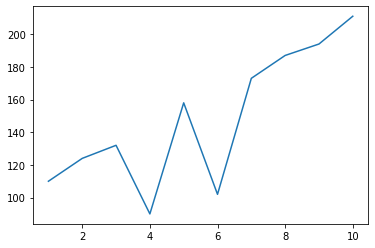

In [3]:
days= np.arange(1,11)
plt.plot(days, time_data);

## <font color='green'>**4. Data Preprocessing**</font>

### <font color='orange'>**4.1 Create Independent & Dependent Variables**</font>

#### <font color='magenta'>**Define a prepare data function to create independent & dependent variables**</font>

In [4]:
def prepare_data(time_series, forecast):
  X,y=[],[]
  for i in range(len(time_data)):
    end=i+n_steps

    if end> len(time_data)-1:
      break

    seqX,seqy= time_data[i:end], time_data[end]
    X.append(seqX)
    y.append(seqy)

  return np.array(X), np.array(y)

X,y= prepare_data(time_series = time_data, forecast = n_steps)
X,y

(array([[110, 124, 132],
        [124, 132,  90],
        [132,  90, 158],
        [ 90, 158, 102],
        [158, 102, 173],
        [102, 173, 187],
        [173, 187, 194]]), array([ 90, 158, 102, 173, 187, 194, 211]))

In [5]:
print(X),print(y)

[[110 124 132]
 [124 132  90]
 [132  90 158]
 [ 90 158 102]
 [158 102 173]
 [102 173 187]
 [173 187 194]]
[ 90 158 102 173 187 194 211]


(None, None)

In [6]:
X.shape

(7, 3)

In [7]:
n_features=1
X= X.reshape((X.shape[0]), (X.shape[1]), n_features)
X.shape

(7, 3, 1)

## <font color='green'>**5. Model Development & Evaluation**</font>

In [8]:
# 1. Define LSTM Model
model= Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True,input_shape=(n_steps,n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
# 2. Compile Model
model.compile(optimizer='adam', loss='mse')
# 3. Fit Model
model.fit(X,y, epochs=300, verbose=1)

Epoch 1/300
1/1 [==============================] - 5s 5s/step - loss: 26627.8125
Epoch 2/300
1/1 [==============================] - 0s 15ms/step - loss: 26256.3125
Epoch 3/300
1/1 [==============================] - 0s 22ms/step - loss: 25741.7598
Epoch 4/300
1/1 [==============================] - 0s 20ms/step - loss: 25161.0918
Epoch 5/300
1/1 [==============================] - 0s 23ms/step - loss: 24624.3730
Epoch 6/300
1/1 [==============================] - 0s 23ms/step - loss: 24178.4648
Epoch 7/300
1/1 [==============================] - 0s 22ms/step - loss: 23799.3398
Epoch 8/300
1/1 [==============================] - 0s 33ms/step - loss: 23469.5098
Epoch 9/300
1/1 [==============================] - 0s 26ms/step - loss: 23171.0664
Epoch 10/300
1/1 [==============================] - 0s 16ms/step - loss: 22885.3652
Epoch 11/300
1/1 [==============================] - 0s 14ms/step - loss: 22598.1094
Epoch 12/300
1/1 [==============================] - 0s 15ms/step - loss: 22298.8145
Epo

#### <font color='magenta'>**Define a LSTM_RNN function to build RNN model**</font>

In [9]:
def LSTM_RNN(hidden_unit, dense_unit, activation):
  # 1. Define Model
  model= Sequential()
  model.add(LSTM(hidden_unit, activation, input_shape = input_shape, return_sequences=True))
  model.add(LSTM(hidden_unit, activation))
  model.add(Dense(dense_unit))
  # 2. Compile Model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model

In [10]:
input_shape=(n_steps,n_features)
model= LSTM_RNN(hidden_unit =50, dense_unit =1, activation='relu')
# 3. Model fit
history =  model.fit(X,y, epochs=300, verbose=1)
# 4. Evaluate Model
loss = model.evaluate(X, y)
print("Loss is", loss)

Epoch 1/300
1/1 [==============================] - 4s 4s/step - loss: 26984.5586
Epoch 2/300
1/1 [==============================] - 0s 16ms/step - loss: 26745.5098
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 26526.9824
Epoch 4/300
1/1 [==============================] - 0s 14ms/step - loss: 26322.3848
Epoch 5/300
1/1 [==============================] - 0s 20ms/step - loss: 26123.9707
Epoch 6/300
1/1 [==============================] - 0s 15ms/step - loss: 25924.7637
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 25713.4980
Epoch 8/300
1/1 [==============================] - 0s 11ms/step - loss: 25483.3223
Epoch 9/300
1/1 [==============================] - 0s 16ms/step - loss: 25226.1719
Epoch 10/300
1/1 [==============================] - 0s 21ms/step - loss: 24933.8066
Epoch 11/300
1/1 [==============================] - 0s 19ms/step - loss: 24594.6895
Epoch 12/300
1/1 [==============================] - 0s 15ms/step - loss: 24202.1875
Epo

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 3, 50)             10400     
                                                                 
 lstm_3 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


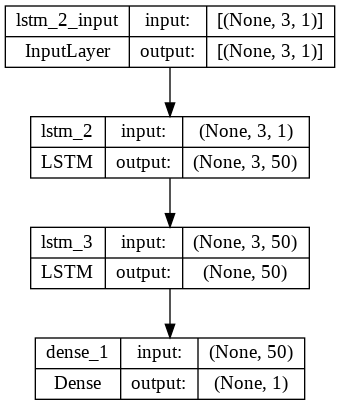

In [12]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

## <font color='green'>**6. Model Prediction**</font>

In [13]:
x_input= np.array([100,98,113])
temp= list(x_input)

output=[]
i=0
while i<10:
  if len(temp)>3:
    x_input= np.array(temp[1:])
    print("Day {} input is {}". format(i+1, x_input))
    x_input= x_input.reshape((1,n_steps, n_features)) 
    ypred= model.predict(x_input, verbose=0)
    print("Day {} output is {}". format(i+1, ypred))
    temp.append(ypred[0][0])
    temp=temp[1:]
    output.append(ypred[0][0])
    i=i+1

  else:
    print("Day 1 input is", x_input)
    x_input= x_input.reshape((1,n_steps, n_features))
    ypred= model.predict(x_input, verbose=0)
    print("Day 1 output is", ypred[0])
    temp.append(ypred[0][0])
    output.append(ypred[0][0])
    i=i+1

Day 1 input is [100  98 113]
Day 1 output is [71.56721]
Day 2 input is [ 98.         113.          71.56720734]
Day 2 output is [[133.54959]]
Day 3 input is [113.          71.56720734 133.54959106]
Day 3 output is [[72.76907]]
Day 4 input is [ 71.56721 133.54959  72.76907]
Day 4 output is [[146.18301]]
Day 5 input is [133.54959  72.76907 146.18301]
Day 5 output is [[148.79256]]
Day 6 input is [ 72.76907 146.18301 148.79256]
Day 6 output is [[158.83325]]
Day 7 input is [146.18301 148.79256 158.83325]
Day 7 output is [[165.6936]]
Day 8 input is [148.79256 158.83325 165.6936 ]
Day 8 output is [[172.81305]]
Day 9 input is [158.83325 165.6936  172.81305]
Day 9 output is [[187.92757]]
Day 10 input is [165.6936  172.81305 187.92757]
Day 10 output is [[194.05971]]


In [14]:
x_input= np.array([100,98,113])
temp= list(x_input)

output=[]
i=10
while i<20:
  if len(temp)>3:
    x_input= np.array(temp[1:])
    print("Day {} input is {}". format(i+1, x_input))
    x_input= x_input.reshape((1,n_steps, n_features)) 
    ypred= model.predict(x_input, verbose=0)
    print("Day {} output is {}". format(i+1, ypred))
    temp.append(ypred[0][0])
    temp=temp[1:]
    output.append(ypred[0][0])
    i=i+1

  else:
    print("Day 11 input is", x_input)
    x_input= x_input.reshape((1,n_steps, n_features))
    ypred= model.predict(x_input, verbose=0)
    print("Day 11 output is", ypred[0])
    temp.append(ypred[0][0])
    output.append(ypred[0][0])
    i=i+1

Day 11 input is [100  98 113]
Day 11 output is [71.56721]
Day 12 input is [ 98.         113.          71.56720734]
Day 12 output is [[133.54959]]
Day 13 input is [113.          71.56720734 133.54959106]
Day 13 output is [[72.76907]]
Day 14 input is [ 71.56721 133.54959  72.76907]
Day 14 output is [[146.18301]]
Day 15 input is [133.54959  72.76907 146.18301]
Day 15 output is [[148.79256]]
Day 16 input is [ 72.76907 146.18301 148.79256]
Day 16 output is [[158.83325]]
Day 17 input is [146.18301 148.79256 158.83325]
Day 17 output is [[165.6936]]
Day 18 input is [148.79256 158.83325 165.6936 ]
Day 18 output is [[172.81305]]
Day 19 input is [158.83325 165.6936  172.81305]
Day 19 output is [[187.92757]]
Day 20 input is [165.6936  172.81305 187.92757]
Day 20 output is [[194.05971]]


In [15]:
output

[71.56721,
 133.54959,
 72.76907,
 146.18301,
 148.79256,
 158.83325,
 165.6936,
 172.81305,
 187.92757,
 194.05971]

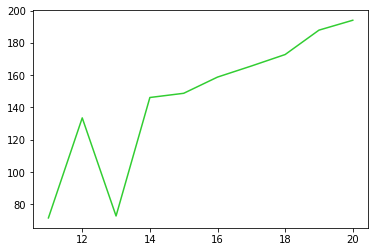

In [16]:
days= np.arange(11,21)
plt.plot(days, output, color = 'limegreen');

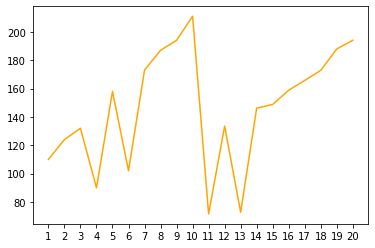

In [17]:
time_data.extend(output)
days= np.arange(1,21)
plt.plot(days, time_data, 'orange')
plt.xticks(range(1,21));